In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
data_path = '../data/raw/mtsamples.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (4999, 6)

Columns: ['Unnamed: 0', 'description', 'medical_specialty', 'sample_name', 'transcription', 'keywords']


In [3]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [5]:
print("Available columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Available columns:
1. Unnamed: 0
2. description
3. medical_specialty
4. sample_name
5. transcription
6. keywords


In [6]:
print("\nSample from each column:")
for col in df.columns:
    print(f"\n{'='*50}")
    print(f"Column: {col}")
    print(f"{'='*50}")
    sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else "No data"
    print(str(sample)[:200] + "..." if len(str(sample)) > 200 else str(sample))


Sample from each column:

Column: Unnamed: 0
0

Column: description
 A 23-year-old white female presents with complaint of allergies.

Column: medical_specialty
 Allergy / Immunology

Column: sample_name
 Allergic Rhinitis 

Column: transcription
SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried ...

Column: keywords
allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,


In [7]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64


In [8]:
text_col = 'transcription'
summary_col = 'description'

In [9]:
df_clean = df[[text_col, summary_col]].dropna()
print(f"\nRows after removing missing values: {len(df_clean)}")


Rows after removing missing values: 4966


In [10]:
df_clean['text_length'] = df_clean[text_col].str.len()
df_clean['summary_length'] = df_clean[summary_col].str.len()
df_clean['compression_ratio'] = df_clean['summary_length'] / df_clean['text_length']


In [11]:
print("Text Length Statistics:")
print(df_clean['text_length'].describe())
print("\nSummary Length Statistics:")
print(df_clean['summary_length'].describe())
print("\nCompression Ratio Statistics:")
print(df_clean['compression_ratio'].describe())

Text Length Statistics:
count     4966.000000
mean      3052.314337
std       1994.082239
min         11.000000
25%       1608.000000
50%       2667.000000
75%       4011.000000
max      18425.000000
Name: text_length, dtype: float64

Summary Length Statistics:
count    4966.000000
mean      132.773661
std        80.239897
min         1.000000
25%        69.000000
50%       118.000000
75%       181.000000
max       492.000000
Name: summary_length, dtype: float64

Compression Ratio Statistics:
count    4966.000000
mean        0.086285
std         0.400333
min         0.000331
25%         0.025687
50%         0.043863
75%         0.075781
max        15.818182
Name: compression_ratio, dtype: float64


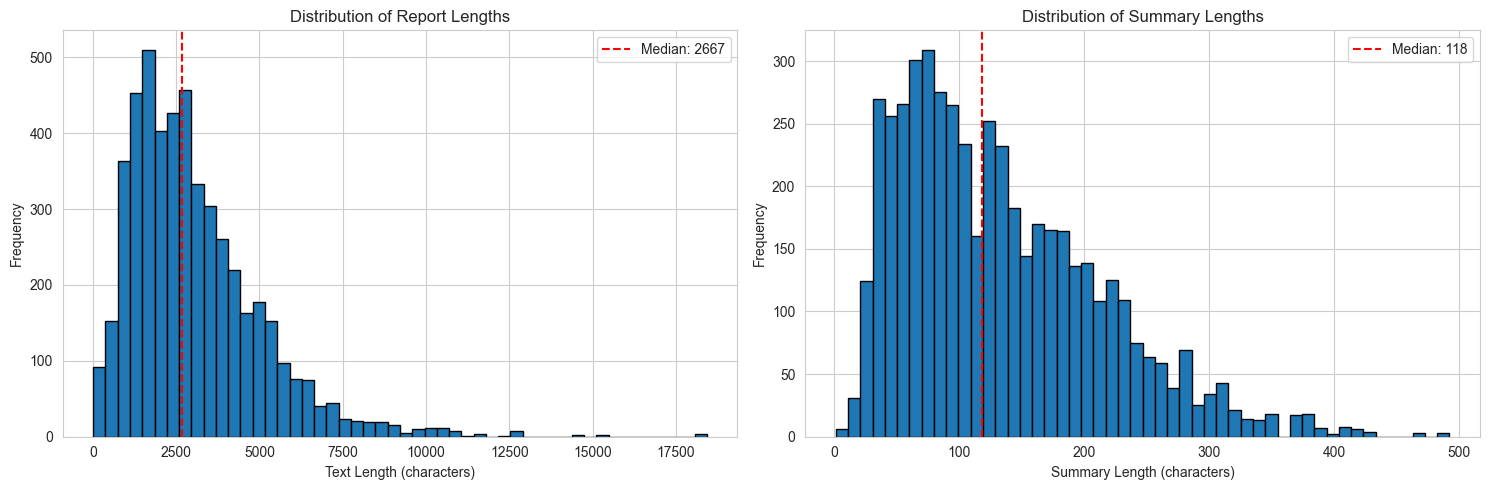

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_clean['text_length'], bins=50, edgecolor='black')
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Report Lengths')
axes[0].axvline(df_clean['text_length'].median(), color='red', linestyle='--', label=f'Median: {df_clean["text_length"].median():.0f}')
axes[0].legend()

axes[1].hist(df_clean['summary_length'], bins=50, edgecolor='black')
axes[1].set_xlabel('Summary Length (characters)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Summary Lengths')
axes[1].axvline(df_clean['summary_length'].median(), color='red', linestyle='--', label=f'Median: {df_clean["summary_length"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

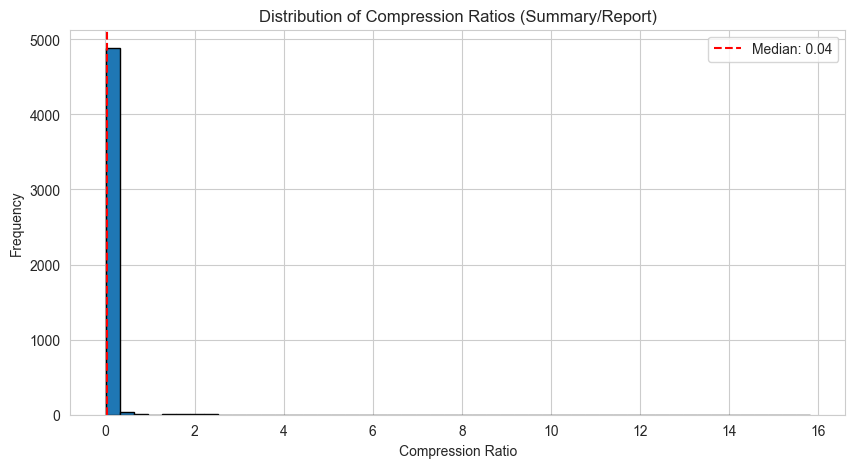

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(df_clean['compression_ratio'], bins=50, edgecolor='black')
plt.xlabel('Compression Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Compression Ratios (Summary/Report)')
plt.axvline(df_clean['compression_ratio'].median(), color='red', linestyle='--', label=f'Median: {df_clean["compression_ratio"].median():.2f}')
plt.legend()
plt.show()

In [14]:
df_clean['text_word_count'] = df_clean[text_col].str.split().str.len()
df_clean['summary_word_count'] = df_clean[summary_col].str.split().str.len()

print("Word Count Statistics:")
print("\nReport Word Count:")
print(df_clean['text_word_count'].describe())
print("\nSummary Word Count:")
print(df_clean['summary_word_count'].describe())


Word Count Statistics:

Report Word Count:
count    4966.000000
mean      465.448852
std       316.386344
min         1.000000
25%       241.000000
50%       398.000000
75%       615.000000
max      3029.000000
Name: text_word_count, dtype: float64

Summary Word Count:
count    4966.000000
mean       18.545711
std        11.978355
min         0.000000
25%         9.000000
50%        16.000000
75%        25.750000
max        76.000000
Name: summary_word_count, dtype: float64


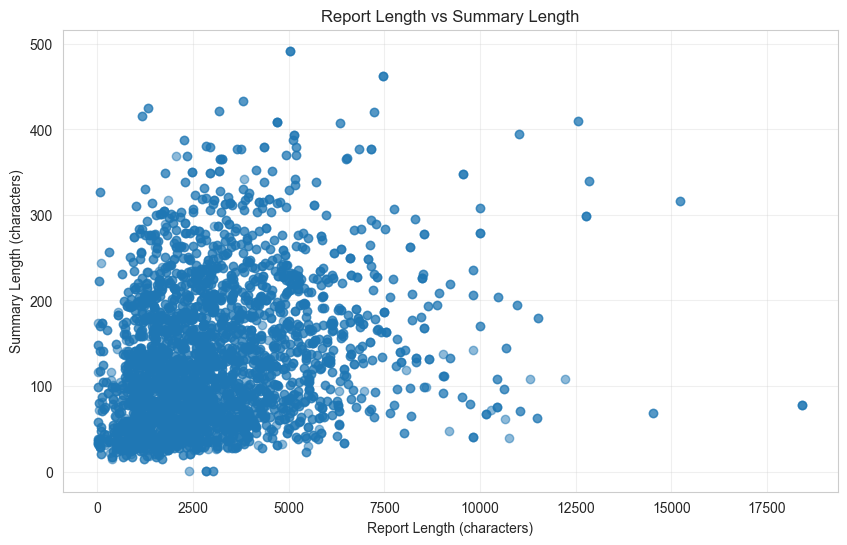

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['text_length'], df_clean['summary_length'], alpha=0.5)
plt.xlabel('Report Length (characters)')
plt.ylabel('Summary Length (characters)')
plt.title('Report Length vs Summary Length')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
print("Sample Report-Summary Pairs:\n")
for idx in df_clean.sample(3).index:
    print("="*80)
    print(f"REPORT (first 200 chars):")
    print(df_clean.loc[idx, text_col][:200] + "...")
    print(f"\nSUMMARY:")
    print(df_clean.loc[idx, summary_col])
    print("="*80)
    print()

Sample Report-Summary Pairs:

REPORT (first 200 chars):
PREOPERATIVE DIAGNOSIS: , Thyroid goiter.,POSTOPERATIVE DIAGNOSIS:  ,Thyroid goiter.,PROCEDURE PERFORMED: , Total thyroidectomy.,ANESTHESIA:,1.  General endotracheal anesthesia.,2.  9 cc of 1% lidocai...

SUMMARY:
 Total thyroidectomy.  The patient is a female with a history of Graves disease.  Suppression was attempted, however, unsuccessful.  She presents today with her thyroid goiter. 

REPORT (first 200 chars):
SUMMARY:  ,The patient has attended physical therapy from 11/16/06 to 11/21/06.  The patient has 3 call and cancels and 3 no shows.  The patient has been sick for several weeks due to a cold as well a...

SUMMARY:
 Outpatient rehabilitation physical therapy progress note.  A 52-year-old male referred to physical therapy secondary to chronic back pain, weakness, and debilitation secondary to chronic pain. 

REPORT (first 200 chars):
SUBJECTIVE:,  This is a 12-year-old male who comes in for healthy checkups and sports phy